# Consumo de alcohol y tabaco y su relación con el coeficiente de felicidad de distintos paises.



En este estudio investigaremos la relación entre el consumo de tabaco y alcohol con el coeficiente de felicidad de distintos paises. 

In [91]:
#Cargamos librerías
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Selección de los datos

### Coeficiente de Felicidad (2005-2023)


In [92]:
# Cargar los datos especificando la codificación 'latin1'
df = pd.read_csv("World-happiness-report-updated_2024.csv", encoding='latin1', sep=',')

In [93]:
df.head(5)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


Podemos Observar las siguientes variables:
1. Country name: nombre del país
2. Life Ladder: Coeficiente de felicidad
3. Log GDP per capita: El logaritmo natural del PIB per cápita del país, ajustado por la paridad del poder adquisitivo (PPA) para tener en cuenta las diferencias en el coste de vida entre países.
4. El promedio nacional de respuestas binarias (0 o 1 que representan No/Sí) a la pregunta sobre tener familiares o amigos con quienes contar en tiempos de problemas.
5. Healthy life expectancy at birth: Esperanza de vida sana al nacer.
6. Freedom to make life choices: Media nacional de respuestas sobre la libertad dentro del país (coeficiente de libertad).
7. Generosidad: Coeficiente de generosidad
8. Perceptions of corruption: Coeficiente de percepción de corrupción.
9. Positive effect: El promedio nacional de respuestas a preguntas sobre las emociones positivas vividas ayer.
10. Negative effect: El promedio nacional de respuestas a preguntas sobre las emociones negativas vividas ayer.

La base de datos ha sido obtenida a traves de: https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated

### Consumo de Tabaco (2008-2018)

In [94]:
#cargamos los datos del uso de tabaco global:
df_smoking1 =  pd.read_csv("SmokingAndTobaccoData2008.csv", sep=',')
df_smoking2 =  pd.read_csv("SmokingAndTobaccoData2010.csv", sep=',')
df_smoking3 =  pd.read_csv("SmokingAndTobaccoData2012.csv", sep=',')
df_smoking4 =  pd.read_csv("SmokingAndTobaccoData2014.csv", sep=',')
df_smoking5 =  pd.read_csv("SmokingAndTobaccoData2016.csv", sep=',')
df_smoking6 =  pd.read_csv("SmokingAndTobaccoData2018.csv", sep=',')

In [95]:
df_smoking1.head(5)

,Location,CigaretteSmokingPrevalence,TobaccoSmokingPrevalence,TobaccoUsePrevalance,HealyWarningsOnSmoking,MostSoldBrandCigaretteCurrency,MostSoldBrandCigarettePrice,TreatmentInHealthFacilities,BanOnEducationalFacilites,BanOnGovernmentFacilites,BanOnHealthcareFacilites,BanOnIndoorOffices,BanOnPublicTransport,BanOnPubsAndBars,BanOnRestaurants,BanOnUniversities,RegulationsOnSmokeFreeEnvironments
0,Albania,46.8 [35.3 – 56.3],54.4 [45 – 66.6],54.4 [45 – 66.6],No,All,130,Data not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available
1,Algeria,12.1 [6.7 – 17.6],15.9 [11.2 – 21.1],20.8 [11.3 – 30.3],No,DZD,70,No,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,3
2,Andorra,28.9 [19 – 41.1],35.1 [26.3 – 44.9],35.1 [26.3 – 44.9],Not applicable,Not applicable,Data not available,No,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not applicable
3,Argentina,28.3 [23 – 33.6],31.2 [25.5 – 37.1],34.1 [27.2 – 42.8],Not applicable,ARS,3.8,Yes in some,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not applicable
4,Armenia,29.2 [24.3 – 34.1],31.3 [26.4 – 36.6],31.3 [26.4 – 36.6],Not applicable,AMD,500,Yes in some,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available


La base de datos ha sido obtenida a traves de: kaggle.com/datasets/ozgurdogan646/who-tobacco-and-smoking-data-20082018?select=SmokingAndTobaccoData2008.csv

### Consumo de Alcohol (2000-2018)

In [96]:
df_alcohol1 = pd.read_csv("alcohol-consumption-vs-gdp-per-capita.csv", sep=',')

In [97]:
df_alcohol1.head(5)

,Entity,Code,Year,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2010,0.21,1957.029070,29185511.0,NaN
2,Afghanistan,AFG,2015,0.21,2068.265904,34413603.0,Asia
3,Afghanistan,AFG,2018,0.21,2033.804389,37171922.0,NaN
4,Afghanistan,AFG,2002,NaN,1189.784668,22600774.0,NaN


La base de datos ha sido obtenida a traves de:https://www.kaggle.com/code/mattop/worldwide-alcohol-consumption-eda

## Preprocesamiento de Datos

### Consumo Tabaco

In [98]:
dfs = [df_smoking1, df_smoking2, df_smoking3, df_smoking4, df_smoking5, df_smoking6]

# Seleccionamos las columnas de los dfs que nos interesan y las concatenamos
df_combined = pd.concat([df[['Location', 'TobaccoSmokingPrevalence']] for df in dfs], ignore_index=True)

In [99]:
df_combined.head()

,Location,TobaccoSmokingPrevalence
0,Albania,54.4 [45 – 66.6]
1,Algeria,15.9 [11.2 – 21.1]
2,Andorra,35.1 [26.3 – 44.9]
3,Argentina,31.2 [25.5 – 37.1]
4,Armenia,31.3 [26.4 – 36.6]


In [100]:
#Quitamos Nans
df_combined.dropna(inplace=True)

# Función para quitar los [] en la columna TobaccoSmokingPrevalence
def clean_prevalence(value):
    cleaned_value = str(value).split('[')[0].strip()
    try:
        #convertimos a float
        return float(cleaned_value)
    except ValueError:
        return None
    

# Limpiamos la columna TobaccoSmokingPrevalence
df_combined['TobaccoSmokingPrevalence'] = df_combined['TobaccoSmokingPrevalence'].apply(clean_prevalence)

# Quitamos posibles Nans nuevos
df_combined.dropna(subset=['Location', 'TobaccoSmokingPrevalence'], inplace=True)


In [101]:
# Calculate the average Tobacco Smoking Prevalence for each country
df_smoking = df_combined.groupby('Location')['TobaccoSmokingPrevalence'].mean().reset_index()

# Rename columns for clarity
df_smoking.columns = ['Country name', 'Average Tobacco Prevalence']

df_smoking.head(5)

,Country name,Average Tobacco Prevalence
0,Albania,52.200000
1,Algeria,15.116667
2,Andorra,34.350000
3,Argentina,25.533333
4,Armenia,28.816667


In [102]:
df_smoking.describe()

,Average Tobacco Prevalence
count,149.000000
mean,23.558949
std,11.789620
min,2.266667
25%,14.483333
50%,23.766667
75%,30.800000
max,56.116667


### Consumo Alcohol

In [103]:
# Solo nos interesan los paises y la variable de consumo de tabaco.
df_alcohol_selected = df_alcohol1[['Entity', 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)']].copy()

# Quitamos Nans
df_alcohol_selected.dropna(subset=['Entity', 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)'], inplace=True)

# Calculamos la media de consumo de alcohol por pais
df_alcohol = df_alcohol_selected.groupby('Entity')['Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)'].mean().reset_index()

# Rename columns for clarity
df_alcohol.columns = ['Country name', 'Average alcohol consumption per capita (2000 - 2018)']
df_alcohol.head(5)

,Country name,Average alcohol consumption per capita (2000 - 2018)
0,Afghanistan,0.210000
1,Africa Eastern and Southern,5.131846
2,Africa Western and Central,7.421209
3,Albania,7.164000
4,Algeria,0.784000


### Coeficiente Felicidad

In [104]:
#Buscamos valores faltantes
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [105]:
#Quitamos las filas que tengan datos faltantes y guardamos el df original.
df_original = df
df = df.dropna()

In [106]:
#Buscamos outliers
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000
mean,2014.901288,5.466519,9.356038,0.807031,63.271555,0.748854,0.000247,0.747093,0.653721,0.274795
std,4.965942,1.136940,1.154684,0.123678,7.003554,0.138791,0.162192,0.183878,0.107392,0.085464
min,2005.000000,2.179000,5.527000,0.290000,6.720000,0.258000,-0.340000,0.035000,0.179000,0.094000
25%,2011.000000,4.612000,8.465000,0.736000,58.660000,0.659000,-0.109000,0.691000,0.572000,0.211000
50%,2015.000000,5.433000,9.497000,0.834000,65.100000,0.769000,-0.021000,0.801000,0.665000,0.264000
75%,2019.000000,6.291000,10.320000,0.905000,68.680000,0.860000,0.093000,0.868000,0.740000,0.326000
max,2023.000000,7.971000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


In [107]:
#Eliminamos outliers usando el método intercuartílico
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3-Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [108]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000
mean,2014.875558,5.385794,9.282461,0.807488,63.053817,0.739060,-0.023578,0.791834,0.649458,0.276574
std,4.959988,1.014540,1.069170,0.110385,6.438764,0.128966,0.143574,0.116739,0.103921,0.078478
min,2005.000000,2.634000,5.935000,0.483000,43.960000,0.364000,-0.340000,0.426000,0.332000,0.094000
25%,2011.000000,4.621250,8.476250,0.739000,58.500000,0.652000,-0.128000,0.730750,0.567000,0.221000
50%,2015.000000,5.379500,9.456500,0.830000,64.810000,0.755000,-0.040000,0.814000,0.657500,0.269000
75%,2019.000000,6.115250,10.146250,0.897000,67.600000,0.838000,0.067000,0.877000,0.730000,0.328250
max,2023.000000,7.662000,11.628000,0.985000,74.600000,0.985000,0.396000,0.983000,0.884000,0.497000


Antes de comenzar nuestro análisis de PCA, encontraremos las medias para cada país. De esta forma tendremos una fila por país. 

In [109]:
#Guardamos las medias en un df 
df_avg = df.groupby('Country name').mean().reset_index()

In [110]:
#No nos importa la media del año
df_avg.drop(['year'], axis = 1, inplace=True)
df_avg.head()

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,3.703700,7.629900,0.523000,52.16500,0.510600,0.076000,0.831400,0.494300,0.315800
1,Albania,5.072750,9.416938,0.714250,68.54875,0.694937,-0.068188,0.868688,0.559750,0.294563
2,Algeria,5.269000,9.334500,0.818750,66.25000,0.511750,-0.122625,0.696875,0.535125,0.263750
3,Angola,4.420250,8.985750,0.738250,52.15000,0.456250,-0.093250,0.866750,0.625750,0.351250
4,Argentina,6.289667,10.028833,0.901833,66.70000,0.777722,-0.153222,0.839056,0.737944,0.288333


*Nota*: No hace falta quitar variables correlacionadas en PCA

### Union de BBDD

In [111]:

# Calculamos la media del consumo global de alcohol
world_avg_alcohol = df_alcohol['Average alcohol consumption per capita (2000 - 2018)'].mean()

# Calculamos la media del consumo global de tabaco
world_avg_tobacco = df_smoking['Average Tobacco Prevalence'].mean()

# Juntamos df con df_alcohol
df_merged_alcohol = df_avg.merge(df_alcohol, on='Country name', how='left')

# Juntamos df_smoking
df_merged = df_merged_alcohol.merge(df_smoking, on='Country name', how='left')

# Llenamos los NaN con las medias globales.
df_merged['Average alcohol consumption per capita (2000 - 2018)'].fillna(world_avg_alcohol, inplace=True)
df_merged['Average Tobacco Prevalence'].fillna(world_avg_tobacco, inplace=True)

# Mostramos el resultado
df_merged.head(10)


,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Average alcohol consumption per capita (2000 - 2018),Average Tobacco Prevalence
0,Afghanistan,3.703700,7.629900,0.523000,52.165000,0.510600,0.076000,0.831400,0.494300,0.315800,0.210,23.558949
1,Albania,5.072750,9.416938,0.714250,68.548750,0.694937,-0.068188,0.868688,0.559750,0.294563,7.164,52.200000
2,Algeria,5.269000,9.334500,0.818750,66.250000,0.511750,-0.122625,0.696875,0.535125,0.263750,0.784,15.116667
3,Angola,4.420250,8.985750,0.738250,52.150000,0.456250,-0.093250,0.866750,0.625750,0.351250,6.142,23.558949
4,Argentina,6.289667,10.028833,0.901833,66.700000,0.777722,-0.153222,0.839056,0.737944,0.288333,9.140,25.533333
5,Armenia,4.635625,9.318250,0.727563,65.737500,0.594125,-0.200937,0.827312,0.500687,0.436125,5.420,28.816667
6,Australia,7.192778,10.780000,0.933556,70.690000,0.903111,0.234333,0.468889,0.737333,0.221000,11.506,16.533333
7,Austria,7.179000,10.889313,0.918563,70.487500,0.894063,0.132875,0.560438,0.715750,0.190062,12.428,33.666667
8,Azerbaijan,4.935250,9.527750,0.760375,62.507813,0.681125,-0.158250,0.693750,0.518250,0.240687,3.444,21.650000
9,Bahrain,5.819000,10.721000,0.890500,64.880000,0.879000,0.011500,0.610500,0.674000,0.422500,1.516,29.200000


## Análisis de Componentes Principales (PCA)

In [112]:
from sklearn.decomposition import PCA
import numpy as np

# No nos improta el nombre del país
data = df_merged.drop(columns=['Country name'])

# Normalizamos los datos
data_standardized = (data - data.mean()) / data.std()

# Calculamos los componentes principales
pca = PCA()
pca.fit(data_standardized)
data_pca = pca.transform(data_standardized)

In [113]:
# Creamos df con los resultados
pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])
pca_df['Country name'] = df_avg['Country name']

# Varianza por cada componente
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

for i in range(len(explained_variance)):
    print(f"Varianza PC{i+1}: {explained_variance[i]:.2%} (Varianza acumulada: {cumulative_variance[i]:.2%})" +"\n")


Varianza PC1: 40.76% (Varianza acumulada: 40.76%)

Varianza PC2: 18.51% (Varianza acumulada: 59.28%)

Varianza PC3: 8.91% (Varianza acumulada: 68.19%)

Varianza PC4: 7.09% (Varianza acumulada: 75.28%)

Varianza PC5: 6.84% (Varianza acumulada: 82.12%)

Varianza PC6: 5.39% (Varianza acumulada: 87.51%)

Varianza PC7: 5.16% (Varianza acumulada: 92.67%)

Varianza PC8: 3.26% (Varianza acumulada: 95.93%)

Varianza PC9: 1.85% (Varianza acumulada: 97.78%)

Varianza PC10: 1.18% (Varianza acumulada: 98.96%)

Varianza PC11: 1.04% (Varianza acumulada: 100.00%)



Podemos ver que con 3 componentes podemos representar el 68% de la varianza del df, pero neceitamos 7 para representar el 90%.

## Visualización y clustering del PCA usando Kmeans

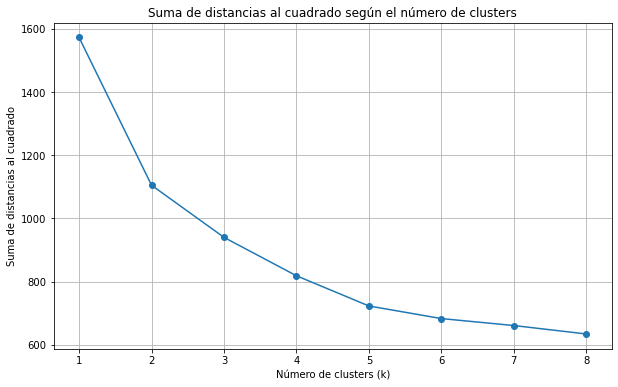

In [114]:
import warnings
# No queremos que imprima el error "KMeans is known to have a memory leak on Windows"
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows")

#Clasificamos usando k-medias
from sklearn.cluster import KMeans

# Probamos distintos números de clusters
num_clusters = [1,2,3,4,5,6,7,8]
sum_dist = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, n_init = 'auto')
    kmeans.fit(data_standardized)  
    sum_dist.append(kmeans.inertia_)

# Metodo del codo
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, sum_dist, marker='o')
plt.title('Suma de distancias al cuadrado según el número de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de distancias al cuadrado')
plt.grid(True)
plt.show()


Utilizando el criterio del codo, está justificada la elección de dos o cinco clusters. 

In [119]:
from sklearn.cluster import KMeans
# Creamos cuatro clusters mediante KMeans
kmeans = KMeans(n_clusters=5, n_init = 10)  
clusters = kmeans.fit_predict(data_pca[:, :3])  # utilizamos los primeros 3 componentes principales

# Añadimos los resultados de la clusterización al df
pca_df['Cluster'] = clusters


In [120]:
#Necesitamos que la librería plotly funcione sin conexión
import plotly.offline as pyo
import plotly.graph_objs as go

pyo.init_notebook_mode(connected=True)

In [121]:
import plotly.express as px
# Visualizamos los tres primeros componentes en 3D usando 
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Cluster',
                    title='Clusterización del PCA usando Kmeans',
                    labels={'PC1': 'Componente Principal 1', 'PC2': 'Componente Principal 2', 'PC3': 'Componente Principal 3'})

# Hacemos que se pueda ver el país al poner el ratón por encima
fig.update_traces(marker=dict(size=5),
                  selector=dict(mode='markers'),
                  hovertemplate="<b>%{text}</b><extra></extra>",
                  text=pca_df['Country name'])

fig.show()

Podemos observar como el componente 1 parece tener más valor cuanto mejor sea el PIB del país. Los otros dos componentes no muestran un significado fácilmente interpretable. Los resultados de la clusterización no son particularmente claros, pero podemos identificar como el cluster 3(naranja) incluye a los paises tradicionalmente desarrollados y 'felices' mientras que el cluster 4(amarillo) parece tener muchos paises africanos donde la calidad de vida es peor. El cluster 0 (azul) incluye muchos paises de America del Sur mientras que el 2(rosa) incluye muchos de Europa del Este y Oriente medio.


## Analisis de Clasificación
Habiendo terminado la investigación de los datos, seguimos con modelos de clasificación de árboles para determinar que factor/facotres influyen en la felicidad de un pais.

In [122]:
df_merged.head(5)

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Average alcohol consumption per capita (2000 - 2018),Average Tobacco Prevalence
0,Afghanistan,3.703700,7.629900,0.523000,52.16500,0.510600,0.076000,0.831400,0.494300,0.315800,0.210,23.558949
1,Albania,5.072750,9.416938,0.714250,68.54875,0.694937,-0.068188,0.868688,0.559750,0.294563,7.164,52.200000
2,Algeria,5.269000,9.334500,0.818750,66.25000,0.511750,-0.122625,0.696875,0.535125,0.263750,0.784,15.116667
3,Angola,4.420250,8.985750,0.738250,52.15000,0.456250,-0.093250,0.866750,0.625750,0.351250,6.142,23.558949
4,Argentina,6.289667,10.028833,0.901833,66.70000,0.777722,-0.153222,0.839056,0.737944,0.288333,9.140,25.533333


In [123]:
df = df_merged
# Analizamos correlaciones
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Average alcohol consumption per capita (2000 - 2018),Average Tobacco Prevalence
Life Ladder,1.000000,0.820357,0.785644,0.784537,0.551433,0.169495,0.351260,0.470288,0.335085,0.431962,0.192902
Log GDP per capita,0.820357,1.000000,0.776769,0.841158,0.332008,0.052938,0.209964,0.190851,0.264184,0.511021,0.334143
Social support,0.785644,0.776769,1.000000,0.687057,0.413479,0.046574,0.140706,0.391514,0.441885,0.545421,0.291093
Healthy life expectancy at birth,0.784537,0.841158,0.687057,1.000000,0.336698,0.000947,0.160685,0.143683,0.181443,0.390521,0.293393
Freedom to make life choices,0.551433,0.332008,0.413479,0.336698,1.000000,0.336639,0.386771,0.612797,0.301750,0.218185,0.031151
Generosity,0.169495,0.052938,0.046574,0.000947,0.336639,1.000000,0.284921,0.313261,0.104927,0.113664,0.155339
Perceptions of corruption,0.351260,0.209964,0.140706,0.160685,0.386771,0.284921,1.000000,0.235476,0.198717,0.047224,0.148736
Positive affect,0.470288,0.190851,0.391514,0.143683,0.612797,0.313261,0.235476,1.000000,0.333883,0.123963,0.157827
Negative affect,0.335085,0.264184,0.441885,0.181443,0.301750,0.104927,0.198717,0.333883,1.000000,0.252800,0.051835
Average alcohol consumption per capita (2000 - 2018),0.431962,0.511021,0.545421,0.390521,0.218185,0.113664,0.047224,0.123963,0.252800,1.000000,0.308314


In [124]:
#Nos quitamos el GDP ya que tiene correlación alta con otras dos variables
df.drop(['Log GDP per capita'], axis=1, inplace = True)

Comprobamos que no existan variables con correlaciones de valor absoluto mayores a 0.8

In [125]:
corr_matrix = df.corr()
m = ~(corr_matrix.mask(np.eye(len(corr_matrix), dtype=bool)).abs() > 0.8).any()
m

Life Ladder                                             True
Social support                                          True
Healthy life expectancy at birth                        True
Freedom to make life choices                            True
Generosity                                              True
Perceptions of corruption                               True
Positive affect                                         True
Negative affect                                         True
Average alcohol consumption per capita (2000 - 2018)    True
Average Tobacco Prevalence                              True
dtype: bool

Categorizamos las variables numéricas en base a los cuantiles 25 y 75 de froma que los valores debajo del 25% serán considerados bajos, por encima del 75% altos y entre media serán medianos. Estos criterios se pueden cambiar en base a la distribución de los datos. Nota: No categorizaremos todas las variables sabiendo que la descripción de la práctica indica que se categoricen solo las del area, diámetro y compacidad. Se incluye el código parala categorización de todas las variables.

In [126]:
#Obtenemos los nombres de las variables numéricas
cols = df.select_dtypes([np.number]).columns

In [127]:
df.head()

,Country name,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Average alcohol consumption per capita (2000 - 2018),Average Tobacco Prevalence
0,Afghanistan,3.703700,0.523000,52.16500,0.510600,0.076000,0.831400,0.494300,0.315800,0.210,23.558949
1,Albania,5.072750,0.714250,68.54875,0.694937,-0.068188,0.868688,0.559750,0.294563,7.164,52.200000
2,Algeria,5.269000,0.818750,66.25000,0.511750,-0.122625,0.696875,0.535125,0.263750,0.784,15.116667
3,Angola,4.420250,0.738250,52.15000,0.456250,-0.093250,0.866750,0.625750,0.351250,6.142,23.558949
4,Argentina,6.289667,0.901833,66.70000,0.777722,-0.153222,0.839056,0.737944,0.288333,9.140,25.533333


In [128]:
#Para utlizar el clasificador de arboles tendremos que utilizar valores numéricos para las categorías de bajo, medio y alto (0, 1 y 2)
#Guardamos primero el df original
df_original = df
def replace_func(x, low, high):
    
    if x < low:
        return 0
        #return 'Bajo' 
    elif x > high:
        return 2
        #return 'alto'
    else:
        return 1
        #return 'medio'

for i in cols:
    low = df[i].quantile(.25)
    high = df[i].quantile(.75)
    df[i] = df.apply(lambda x: replace_func(x[i],low,high ),axis = 1)
    
df.head()

,Country name,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Average alcohol consumption per capita (2000 - 2018),Average Tobacco Prevalence
0,Afghanistan,0,0,0,0,2,1,0,1,0,1
1,Albania,1,0,2,1,1,2,0,1,1,2
2,Algeria,1,1,1,0,0,0,0,1,0,0
3,Angola,0,1,0,0,1,2,1,2,1,1
4,Argentina,2,2,1,1,0,1,2,1,1,1


In [129]:
# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = df.drop(['Country name','Life Ladder', 'Social support'], axis=1)
y = df['Life Ladder']

In [130]:
from sklearn.model_selection import train_test_split
# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [131]:
from sklearn.tree import DecisionTreeClassifier
# Crear y entrenar los clasificadores de árbol de decisión
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42,
                                  max_depth=3,              
                                  min_samples_split=2,      
                                  min_samples_leaf=2,   
                                  ccp_alpha=0.01)            

clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42,
                                     max_depth=3,
                                     min_samples_split=2,
                                     min_samples_leaf=2,
                                     ccp_alpha=0.01)        

In [132]:
clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=3,
                       min_samples_leaf=2, random_state=42)

In [133]:
from sklearn.metrics import accuracy_score
# Calcular el error de cada clasificador
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print(f'Accuracy con criterio Gini: {accuracy_gini}')
print(f'Accuracy con criterio Entropy: {accuracy_entropy}')

Accuracy con criterio Gini: 0.7272727272727273
Accuracy con criterio Entropy: 0.7272727272727273


Las reglas generadas usando el criterio Gini tienen el mismo error al clasificar el test, lo que las hace mejor clasificadores. Estas reglas en arbol son las siguientes:

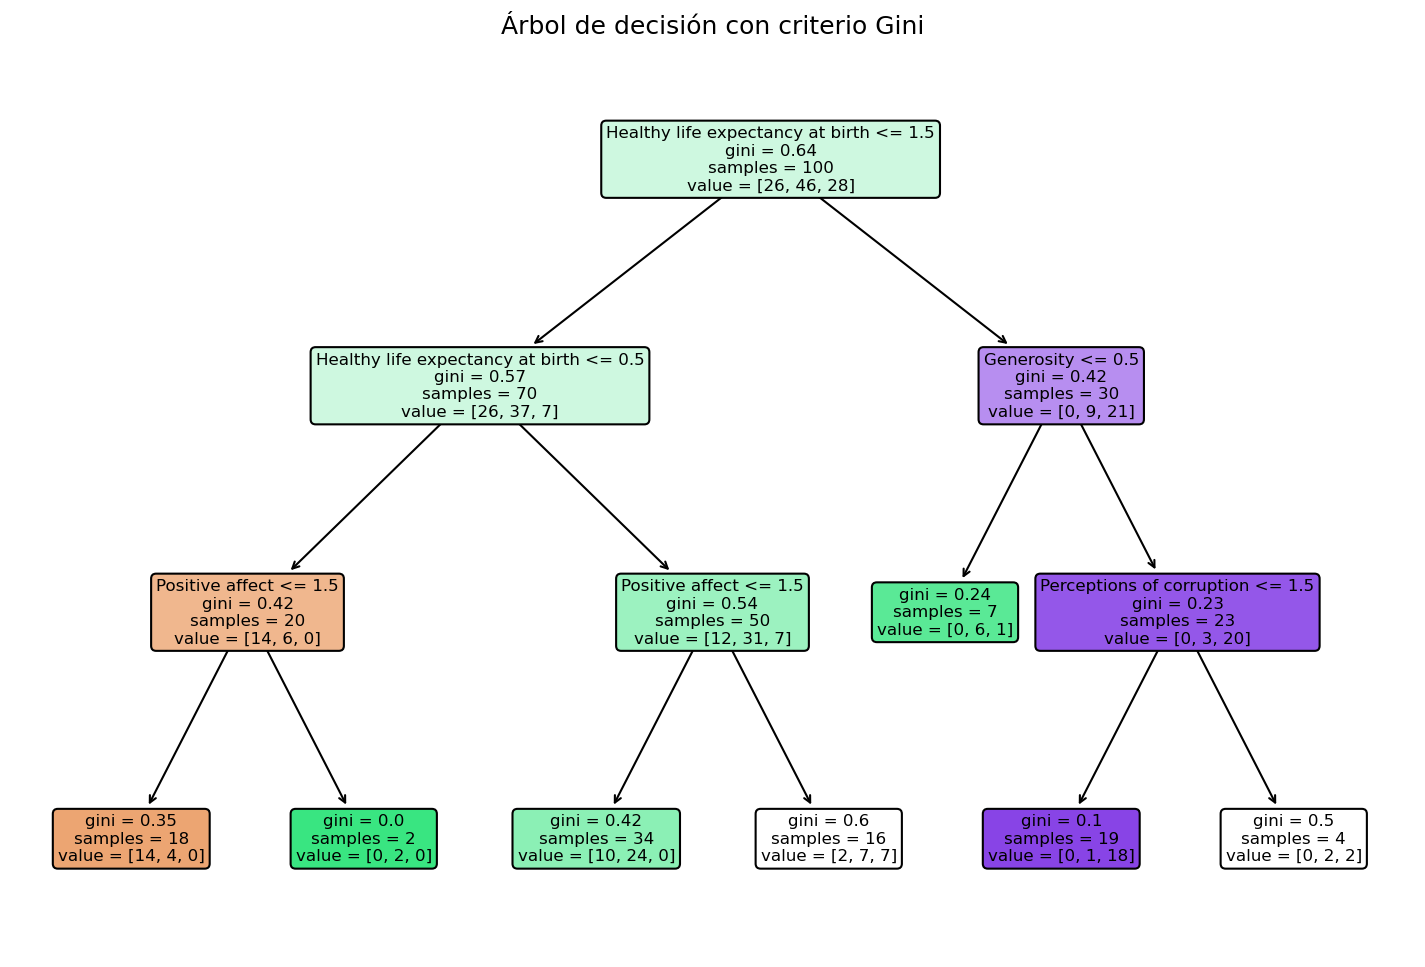

In [134]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder as le
# Dibujar el modelo usando criterio Gini
plt.figure(figsize=(12, 8), dpi=150)
decision_tree = tree.plot_tree(
    clf_gini, 
    filled=True, 
    feature_names=X_train.columns, 
    fontsize=8,  
    precision=2,  
    rounded=True
)
plt.title('Árbol de decisión con criterio Gini')
plt.show()

### Conclusión de clasificación: 
Las reglas más importantes son las siguientes:

Soporte social alto y libertad alta - > felicidad alta (gini = 0.1)
Soporte social bajo y percepción de corrupción no alta -> felicidad baja
Soporte social medio y esperanza de vida no baja -> felicidad media


Esto implica que el factor más importante parece ser el soporte, pero no es suficiente para garantizar un nivel de felicidad en particular. 

Una conclusión que se puede sacar de estos resultados es que el uso de tabaco y alcohol no parece influir en el coeficiente de felicidad de un país.